# Derivatives

## Finite Differences

First derivative is defined using limits as:

$ f'(x)=\frac{df(x)}{dx}=lim_{\Delta x -> 0}\frac{\Delta f(x)}{\Delta x} $

Numerically $\Delta x$ cannot be infinitesimal, so it should be finite and the solution becomes approximate:
    
$f'(x)~= \frac{f(x+\Delta x)-f(x)}{\Delta x}$

Using $x = x_i$, $x \Delta x = x_{i+1}$ and $\Delta x = h$, gives:

$f'(x)~=\frac{f(x_{i+1})-f(x_i)}{h}$

As $x_{i+1}$ gets closer to $x_{i}$ we get an accurate solution at a point. The closer it gets the more accurate the approximate solution. 

Letting $x=x_{i+1}$, $a=x_{i}$,$x-a=x_{i+1}-x_{i}=h$ and using the Taylor series expansion gives:
    
$f'(x_i)=\frac{f(x_{i+1})-f(x_i)}{h}+O(h)$,

the formula of forward finite differences formula plus an estimated error of order of magnitude h.

The derivation for backward finite differences is similar. Using, $x=x_{i-1}$, $a=x_i$ and $x-a=x_{i-1}-x_i=h$ and the Taylor expansion gives:

$f'(x_i)=\frac{f(x_{i})-f(x_{i-1})}{h}+O(h)$.

For the central finite differences the backward taylor series expansion is subtracted from the forward:

$f'(x_i)=\frac{f(x_{i+1})-f(x_{i-1})}{2h}-\frac{f'''(x_i)}{3!}h^2-...$

$f'(x_i)=\frac{f(x_{i+1})-f(x_{i-1})}{2h}+O(h^2)$.

Note the order of the error is less! 
    

# Higher Derivatives - Finite Forward Differences O(h)

$f'(x_i)=\frac{f(x_{i+1})-f(x)}{h}$

$f''(x)=\frac{f(x_{i+2})-2f(x_{i+1})+f(x_i)}{h^2}$

$f'''(x)=\frac{f(x_{i+3})-3f(x_{i+2})+3f(x_{i+1})-f(x_i)}{h^3}$

$f''''(x)=\frac{f(x_{i+4})-4f(x_{i+3})+6f(x_{i+2})-4f(x_{i+1})+f(x_i)}{h^4}$

# Higher Derivatives - Backward Forward Differences O(h)

$ f'(x_i)=\frac{f(x_{i})-f(x_{i-1})}{h} $

$ f''(x)=\frac{f(x_{i})-2f(x_{i-1})+f(x_{i-2})}{h^2} $

$ f'''(x)=\frac{f(x_{i})-3f(x_{i_1})+3f(x_{i-2})-f(x_{i-3})}{h^3} $

$ f''''(x)=\frac{f(x_{i})-4f(x_{i-1})+6f(x_{i-2})-4f(x_{i-3})+f(x_{i-4})}{h^4} $

# Higher Derivatives - Central finite Differences O(h^2)

Note differences are mirrored about the centre. 

$ f'(x_i)=\frac{f(x_{i+1})-f(x_{i-1})}{2h} $

$ f''(x)=\frac{f(x_{i+1})-2f(x_{i})+f(x_{i-1})}{h^2} $

$ f'''(x)=\frac{f(x_{i+2})-2f(x_{i+1})+2f(x_{i-1})-f(x_{i-2})}{2h^3} $

$ f''''(x)=\frac{f(x_{i+2})-4f(x_{i+1})+6f(x_{i})-4f(x_{i-1})+f(x_{i-2})}{h^4} $

# Example

Find first and second derivatives of the polynomial at x=0.1:

$f(x)=0.1x^5-0.2x^3+0.1x-0.2$

In [58]:
import numpy as np

f= lambda x: 0.1*x**5-0.2*x**3+0.1*x-0.2
# define the value of x where we want to calculate the differences
x=0.1
# define step size h
h=0.1
# define analytical values for comparison
df_sol=np.zeros(2)
df_sol[0]=0.09405
df_sol[1]=-0.118

#finite forward differences first and second derivatives
def fin_forward_diff_deriv(function,a,b):
    dff1=(function(a+b)-function(a))/b
    dff2=(function(a+2*b)-2*function(a+b)+f(a))/b**2
    return dff1, dff2
# as above with backward
def fin_back_diff_deriv(function,a,b):
    dff1=(function(a)-function(a-b))/b
    dff2=(function(a)-2*function(a-b)+f(a-2*b))/b**2
    return dff1, dff2
# as above with central
def fin_cent_diff_deriv(function,a,b):
    dff1=(function(a+b)-function(a-b))/(2*b)
    dff2=(function(a+b)-2*function(a)+f(a-b))/b**2
    return dff1, dff2

In [59]:
forward=fin_forward_diff_deriv(f,x,h)
forward_error=df_sol-fin_forward_diff_deriv(f,x,h)
print(forward, forward_error)

(0.08631, -0.22199999999999992) [0.00774 0.104  ]


In [60]:
back=fin_back_diff_deriv(f,x,h)
back_error=df_sol-fin_back_diff_deriv(f,x,h)
print(back, back_error)

(0.09801000000000004, 0.0) [-0.00396 -0.118  ]


In [61]:
cent=fin_cent_diff_deriv(f,x,h)
cent_error=df_sol-fin_cent_diff_deriv(f,x,h)
print(cent, cent_error)

(0.09216000000000002, -0.11700000000000041) [ 0.00189 -0.001  ]


Find the first and second derivatives of the following function in the domain [-1,1] using central finite differences then plot the graphs. Let h=0.01.

$f(x)=0.1x^5-0.2x^3+0.1x-0.2$

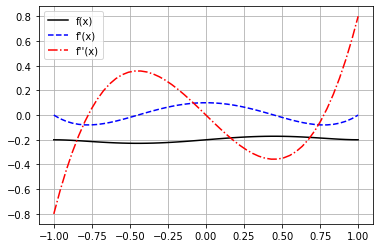

In [79]:
import numpy as np
import matplotlib.pyplot as plt

f=lambda x: 0.1*x**5-0.2*x**3+0.1*x-0.2
h=0.01
x=np.linspace(-1,1) # default number of steps is 50 in a linsapce

fin_cent_diff_deriv(f,x,h)

plt.plot(x,f(x),'-k', label='f(x)')
plt.plot(x, fin_cent_diff_deriv(f,x,h)[0], '--b', label="f'(x)")
plt.plot(x, fin_cent_diff_deriv(f,x,h)[1], '-.r', label="f''(x)")
plt.legend()
plt.grid()